# Google Revenue Prediction

## Kaggle Challenge Description

## What are we predicting?
We are predicting the **natural log** of the sum of all transactions **per user**.

$$ y_{user} = \sum_{i=1}^n transaction_{user_{i}} $$
$$ target_{user} = ln(y_{user} + 1) $$

## Data Cleansing 

In [25]:
%%time
import pandas as pd
import sklearn
import json
import os
import matplotlib
import matplotlib.pyplot as plt
from pandas.io.json import json_normalize
import numpy as np


Wall time: 0 ns


In [23]:
%%time
csv_file = "data\\test_v2.csv"
JSON_COLUMNS = ['device', 'geoNetwork', 'totals', 'trafficSource']
print(os.path.join(os.getcwd(),csv_file))
df = pd.read_csv(os.path.join(os.getcwd(),csv_file),
                converters={column: json.loads for column in JSON_COLUMNS},
                dtype={'fullVisitorId': 'str'},
                nrows=2000)

for column in JSON_COLUMNS:
    column_as_df = json_normalize(df[column])
    column_as_df.columns = ["%s.%s" % (column, subcolumn) for subcolumn in column_as_df.columns]
    df = df.drop(column, axis=1).merge(column_as_df, right_index=True, left_index=True)

C:\Users\Dan\Desktop\google-revenue-prediction\data\test_v2.csv
Wall time: 839 ms


## Columns and Types

In [20]:
df.dtypes

channelGrouping                                       object
customDimensions                                      object
date                                                   int64
fullVisitorId                                         object
hits                                                  object
socialEngagementType                                  object
visitId                                                int64
visitNumber                                            int64
visitStartTime                                         int64
device.browser                                        object
device.browserSize                                    object
device.browserVersion                                 object
device.deviceCategory                                 object
device.flashVersion                                   object
device.isMobile                                         bool
device.language                                       object
device.mobileDeviceBrand

# Target Variable Exploration

We need to sum up the transaction revenue on the user level. Then graph a scatter plot of the natural log.


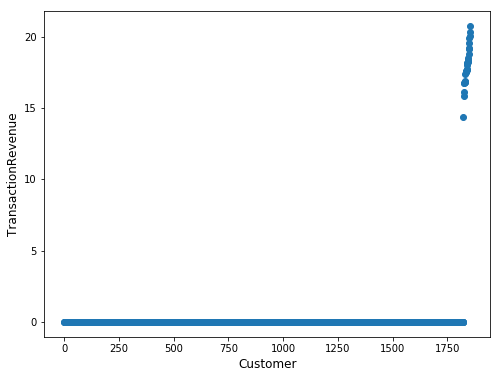

In [27]:
df["totals.transactionRevenue"] = df["totals.transactionRevenue"].astype('float')
gdf = df.groupby("fullVisitorId")["totals.transactionRevenue"].sum().reset_index()

plt.figure(figsize=(8,6))
plt.scatter(range(gdf.shape[0]), np.sort(np.log1p(gdf["totals.transactionRevenue"].values)))
plt.xlabel('Customer', fontsize=12)
plt.ylabel('TransactionRevenue', fontsize=12)
plt.show()

The scatter plot above confirms the 80/20 marketing principle that states 80% of the profits come from 20% of the customers.
